In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import re
import json
import csv 

%matplotlib inline


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Omdena_sentiment/Dataset/Sentiment_Analysis_Dataset.csv')

In [3]:
df.head(10)

,Text,Class_camel
0,حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1,neutral
1,RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...,neutral
2,RT @saud_talep: Retweeted لجنة التنمية بشبرا (...,neutral
3,RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...,neutral
4,RT @abm112211: ولي امر الزوجة او ولي الزوجة او...,neutral
5,RT @fatemaar7: انا كامرأة يوجعني كل حزن نساء ا...,negative
6,@Samar_K_ 😂😂😂😂😂\n اومن حقوق المرأة \n أنك تفتح...,neutral
7,@AliFCD @ShamsanM @AlyemenNor @space_dist @m2r...,negative
8,مبدائيا انا مع حقوق المرأة وضد حقوق الرجل 😁,neutral
9,RT @Dresraamohammed: السؤال بقى للناس الي شغال...,negative


In [4]:
len(df)

198389

In [5]:
df.isna().sum()


Text           0
Class_camel    0
dtype: int64

In [6]:
df[(df['Class_camel']=='neutral') ].count()


Text           36127
Class_camel    36127
dtype: int64

In [7]:
df[(df['Class_camel']=='negative') ].count()


Text           60381
Class_camel    60381
dtype: int64

In [8]:
df[(df['Class_camel']=='positive') ].count()


Text           101881
Class_camel    101881
dtype: int64

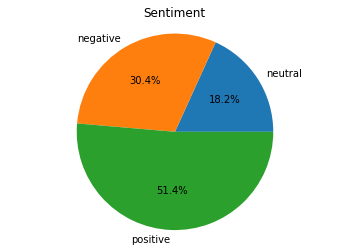

In [9]:
Tasks = [36127,60381,101881]

my_labels = 'neutral','negative','positive'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Sentiment')
plt.axis('equal')
plt.show()

Maximum length Text

In [10]:
max_tweet_length = df.Text.map(len).max()
print(max_tweet_length)

16390


In [12]:
min_tweet_length = df.Text.map(len).min()
print(min_tweet_length)

1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198389 entries, 0 to 198388
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Text         198389 non-null  object
 1   Class_camel  198389 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [28]:
text_duplicate=df[df.duplicated(subset = ['Text'])]


In [29]:
text_duplicate.head()

,Text,Class_camel
425,RT @NORA100011: الولايه سقف يستظل بظله المتحرش...,negative
493,كذابين المرأة بالسعودية مالها حقوق للأسف \n يك...,negative
687,#اسقاط_الولايه_قريبا نطالب باسقاط الولايه,negative
1119,RT @fahd_albluwi: سفر بلا محرم \n كشف الوجه \n...,neutral
1162,@liirel احد فوائد قيادة المرأه خلها تسوق😂,positive


In [30]:
len(text_duplicate)

35882

In [18]:
duplicate = df[df.duplicated()]

In [33]:
duplicate.head(15)

,Text,Class_camel
425,RT @NORA100011: الولايه سقف يستظل بظله المتحرش...,negative
493,كذابين المرأة بالسعودية مالها حقوق للأسف \n يك...,negative
687,#اسقاط_الولايه_قريبا نطالب باسقاط الولايه,negative
1119,RT @fahd_albluwi: سفر بلا محرم \n كشف الوجه \n...,neutral
1162,@liirel احد فوائد قيادة المرأه خلها تسوق😂,positive
1163,@lllollloiii 😍😍 انا مع قيادة المراة,positive
1178,@nampsycho أنا حضريه متحضره متحرره مع قياده ال...,neutral
1188,@Prof_Subaie قرار قيادة المرأة تطبق وبنجاح ولل...,positive
1194,@isalmeens @BNBoodai اخي العزيز في شي اسمه درء...,negative
1195,@itsmemen_ النسويات ذولي اللي يطالبون بحقوقهم ...,negative


In [20]:
len(duplicate)

35882